In [2]:
from pygmo import *
import pygmo as pg
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [4]:
population_size = 50
fitness_results = []

rosenbrock_data = pd.read_csv("Data/rosenbrock_data.csv")
rosenbrock = rosenbrock_data["val"].tolist()


In [4]:
class shifted_rosenbrock:
    def __init__(self, dims):
        self.dims = dims
    def fitness(self, x):
        bias = 390.0
        F = 0.0
        z = np.array(x) - np.array(rosenbrock[:self.dims]) + 1
       
        for i in range(self.dims-1):
            F += (100 * (z[i]**2 - z[i+1])**2) + (z[i] - 1)**2
        global fitness_results
        val = F + bias
        fitness_results.append(val)
        return [val, ]
   
    def get_bounds(self):
        return ([-100]*self.dims,[100]*self.dims)

In [14]:
def execute_algorithm(dims):
    global fitness_results
    fitness_results = []
    current_algorithm = None
    current_problem = None
    current_population = None
    if(dims == 50):
        current_algorithm = algorithm(cmaes(gen=3000, cc=-1, cs=-1, c1=-1, cmu=-1, sigma0=.5, ftol=1e-06, xtol=1e-09, memory=False, force_bounds=True))
        current_problem = pg.problem(shifted_rosenbrock(50))
        current_population = population(current_problem, 100)
    elif(dims == 500):
        current_algorithm = algorithm(sade(gen=30000, variant_adptv=1, ftol=1e-1, xtol=1e-1))
        current_problem = pg.problem(shifted_rosenbrock(500))
        current_population = population(current_problem, 25)
    else : 
        return "Provide correct dimensions"
        
    start_time = time.time()
    current_population_result = current_algorithm.evolve(current_population)
    ended_time = time.time()
    completed_time = ended_time - start_time
    print(current_population_result)
    print("\nComputational time:", round(completed_time, 2), "seconds\n")


Problem name: <class '__main__.shifted_rosenbrock'>
	C++ class name: class pybind11::object

	Global dimension:			50
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-100, -100, -100, -100, -100, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 273500

	Thread safety: none

Population size: 100

List of individuals: 
#0:
	ID:			663809305091343486
	Decision vector:	[-75.4275, -35.7317, -57.5956, 38.9098, 52.2477, ... ]
	Fitness vector:		[390]
#1:
	ID:			3430087986466980729
	Decision vector:	[-75.4275, -35.7317, -57.5956, 38.9098, 52.2477, ... ]
	Fitness vector:		[390]
#2:
	ID:			10536929466173814746
	Decision vector:	[-75.4275, -35.7317, -57.5956, 38.9098, 52.2477, ... ]
	Fitness vect

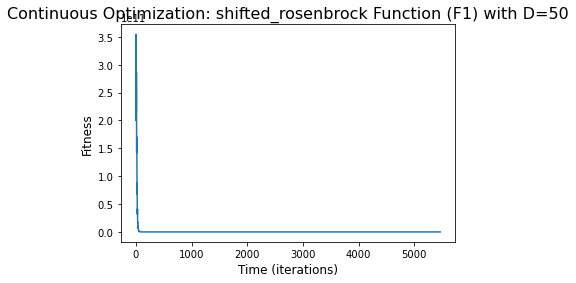

In [16]:
execute_algorithm(50)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: shifted_rosenbrock Function (F1) with D=50", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()


Problem name: <class '__main__.shifted_rosenbrock'>
	C++ class name: class pybind11::object

	Global dimension:			500
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-100, -100, -100, -100, -100, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 750025

	Thread safety: none

Population size: 25

List of individuals: 
#0:
	ID:			2534485592744993471
	Decision vector:	[-75.4494, -35.7706, -57.6731, 38.7601, 51.9752, ... ]
	Fitness vector:		[925.045]
#1:
	ID:			14396859227615284540
	Decision vector:	[-75.4516, -35.774, -57.677, 38.7612, 51.9745, ... ]
	Fitness vector:		[925.129]
#2:
	ID:			8166296226751954203
	Decision vector:	[-75.4495, -35.775, -57.6749, 38.7589, 51.9658, ... ]
	Fitnes

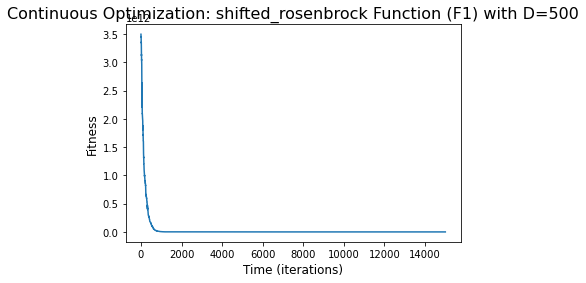

In [17]:
execute_algorithm(500)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: shifted_rosenbrock Function (F1) with D=500", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()